In [1]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

In [2]:
# reference: https://benalexkeen.com/k-means-clustering-in-python/

In [15]:
# file_loc = "/Users/hedayattabesh/Documents/Data/cluster runs"
file_loc = "/Users/hedayattabesh/Documents/scripts/Meme-Analysis/data/"

### Initialisation
df_features_norm = pd.read_json (file_loc + '/norm-memes-beta-features-meme-v5.json')
df_features = pd.read_json (file_loc + '/memes-beta-features-meme-v5.json')
output_file_name = file_loc + "/memes-clustered-features-meme-v5.csv"
# Testing
# df_features = df_features.head(100)

In [16]:
## norm
# create df with X, Y cordinates <- this will make it easier to handle the cordinates
feature_cordinates_norm = pd.DataFrame(columns=['X','Y','path'])
for index, row in df_features_norm.iterrows():
    new_row = {'X':row[1][0], 'Y':row[1][1], 'path':row[0]}
    feature_cordinates_norm = feature_cordinates_norm.append(new_row, ignore_index=True)

In [17]:
## not norm
feature_cordinates = pd.DataFrame(columns=['X','Y','path'])
for index, row in df_features.iterrows():
    new_row = {'X':row[1][0], 'Y':row[1][1], 'path':row[0]}
    feature_cordinates = feature_cordinates.append(new_row, ignore_index=True)

In [18]:
# for plotting later
colors_temp = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
colors = {}
for i, color in enumerate(colors_temp):
    colors[i] = color

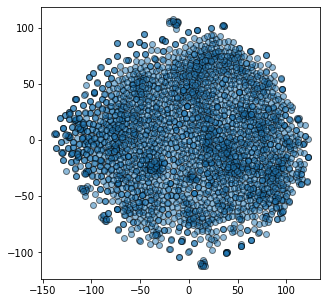

In [19]:
# Plot results
fig = plt.figure(figsize=(5, 5))
plt.scatter(feature_cordinates['X'], feature_cordinates['Y'], alpha=0.5, edgecolor='k')

In [20]:
# now lets figure out the number of cluster we need by using DBSCAN with non-normalized data
clustering = DBSCAN(eps=.5, min_samples=4).fit(feature_cordinates[['X', 'Y']])
k = len(set(clustering.labels_))
k = 20

In [21]:
# now we can use the K to run the k-mean algorithm with that many clusters
kmeans = KMeans(n_clusters=k)
kmeans.fit(feature_cordinates_norm[['X', 'Y']])
labels = kmeans.predict(feature_cordinates_norm[['X', 'Y']])
centroids = kmeans.cluster_centers_

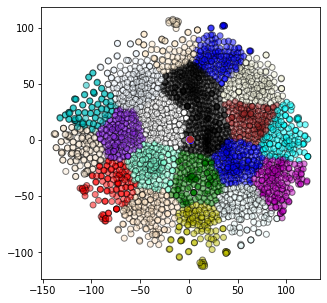

In [22]:
fig = plt.figure(figsize=(5, 5))

colors_map = map(lambda x: colors[x], labels)

plt.scatter(feature_cordinates['X'], feature_cordinates['Y'], color=list(colors_map), alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colors[idx])

In [23]:
# lets save to a new json
feature_cordinates_norm['cluster'] = labels
feature_cordinates_norm.to_csv(output_file_name, index=False)